### Imports

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from scipy.stats import ttest_ind, chi2_contingency

import matplotlib.pyplot as plt

### Add csv

In [88]:
df = pd.read_csv('cleveland.csv')

# Rename 'num' column to 'disease' and change 1,2,3,4 to 1
df = df.rename({'num':'disease'}, axis=1)
df['disease'] = df.disease.apply(lambda x: min(x, 1))

# get rid of missing data
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


### Finding good features

here, we categorize the different kinds of data that we have, and then compare the distribution of that feature in both populations

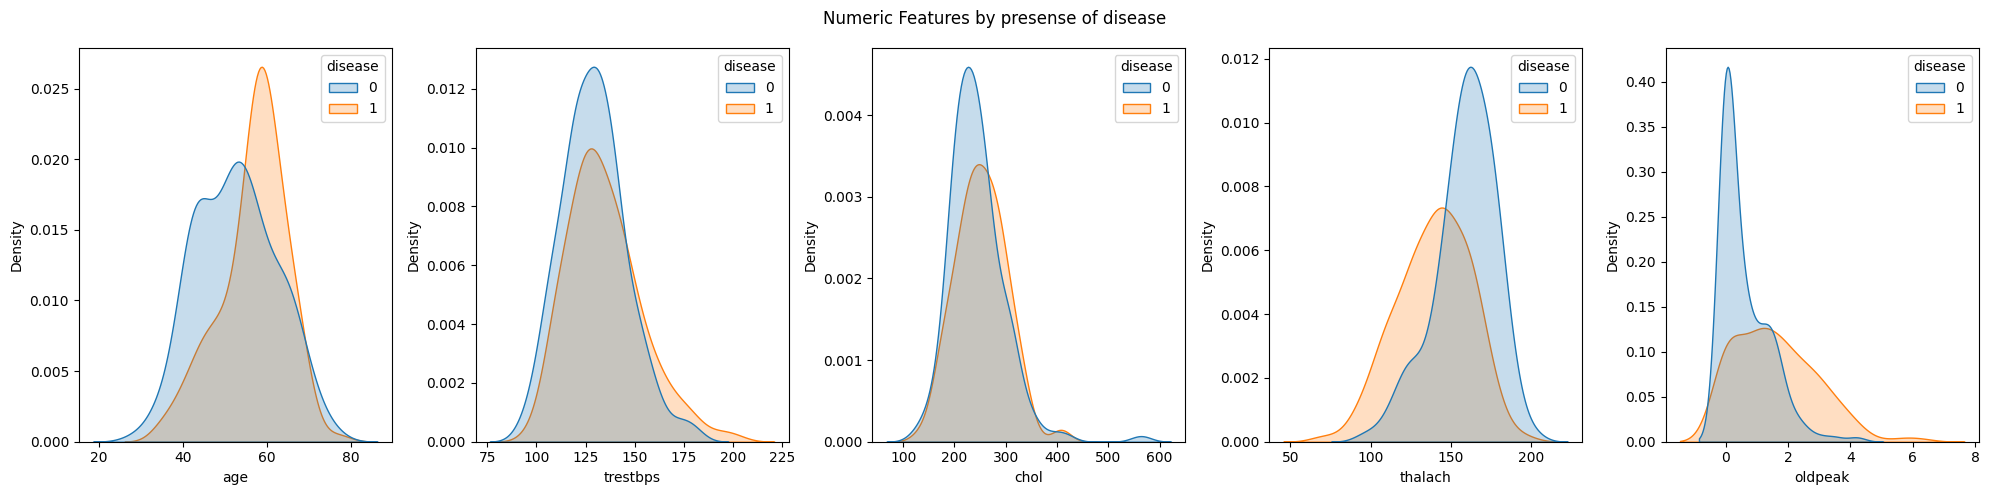

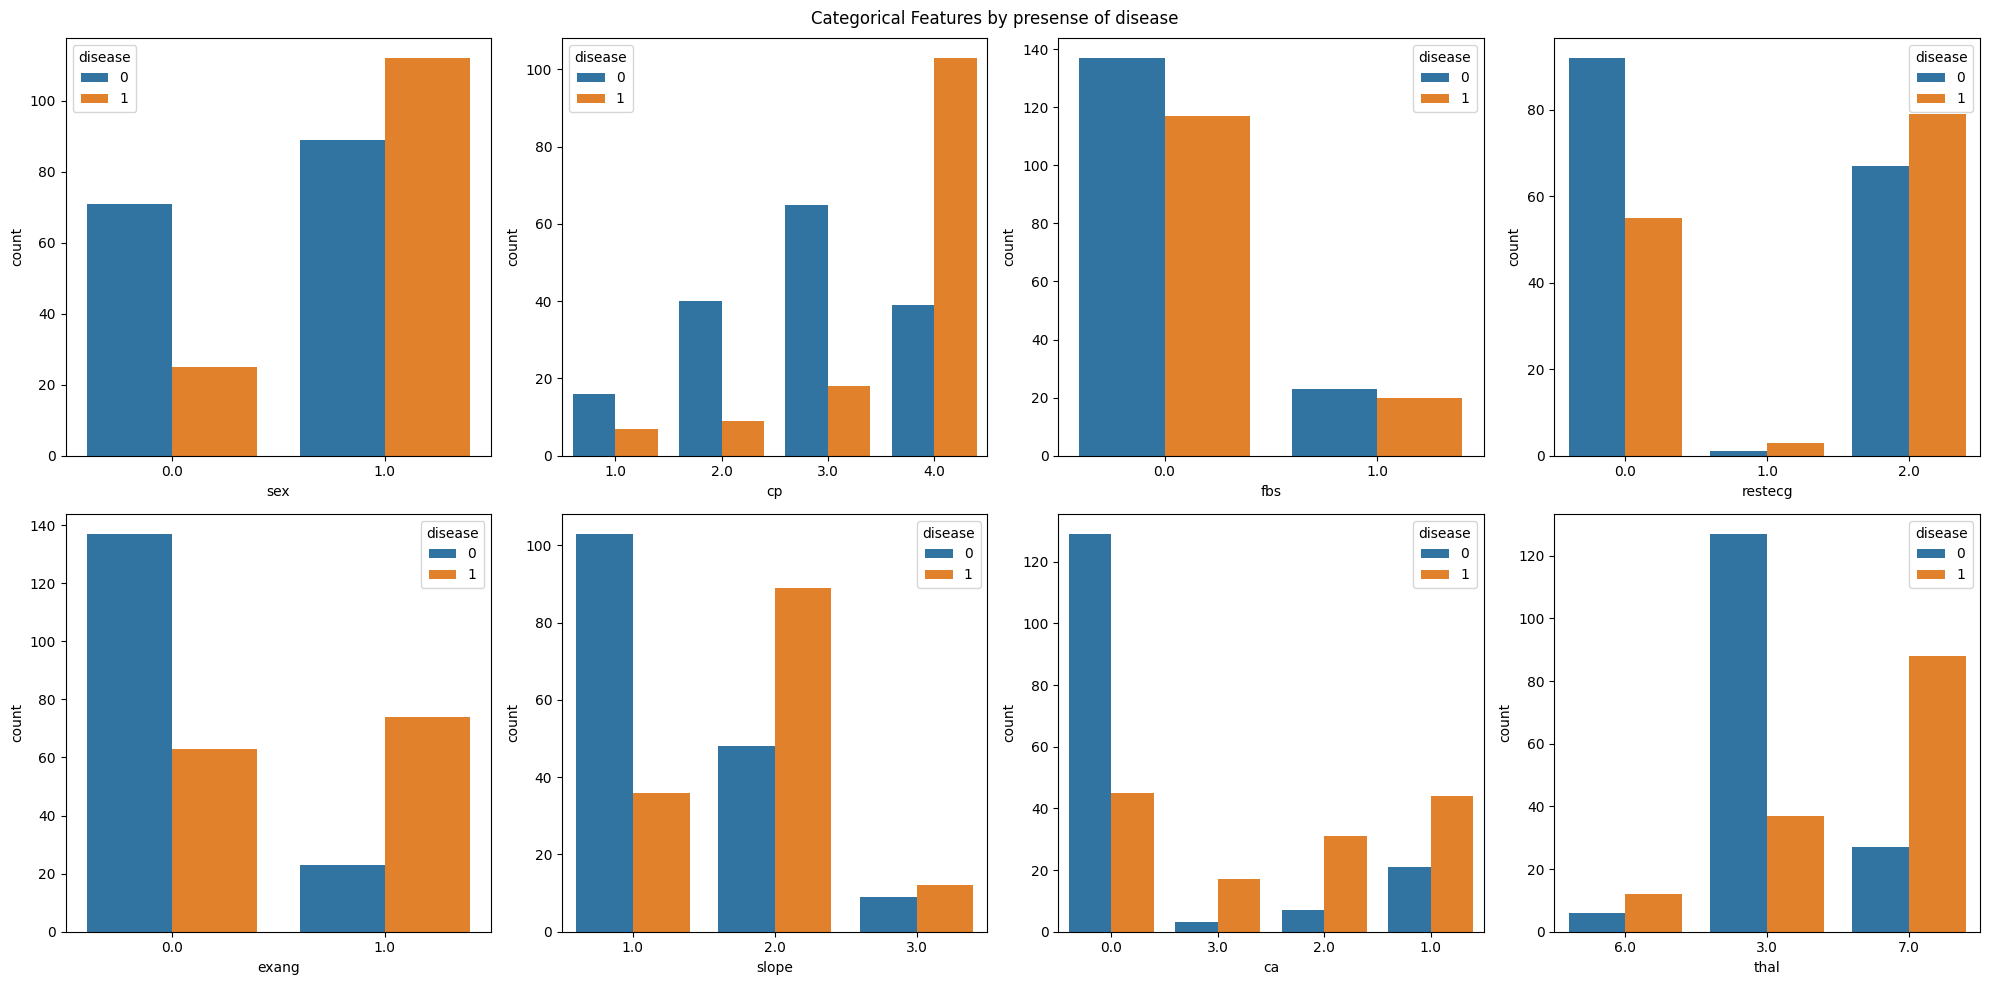

In [89]:
numeric = [
    'age',
    'trestbps',
    'chol',
    'thalach',
    'oldpeak',
]

categorical = [
    'sex',
    'cp',
    'fbs',
    'restecg',
    'exang',
    'slope',
    'ca',
    'thal',
]

fig, axs = plt.subplots(ncols=5, figsize=(20, 5))
fig.suptitle('Numeric Features by presense of disease')
for i in range(len(numeric)):
    sns.kdeplot(data=df, x=numeric[i], hue='disease', ax=axs[i], fill=True)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
fig.suptitle('Categorical Features by presense of disease')
for i in range(len(categorical)):
    sns.countplot(data=df, x=categorical[i], hue='disease', ax=axs[i//4][i%4])
plt.tight_layout()
plt.show()

From those graphs, there are some suspicious features. specifically, I will investigate if there is a correlation between disease and:
1. age
2. thalach
3. oldpeak
4. sex
5. cp
6. slope
7. ca
8. thal

In [90]:
# test if there is a difference in the means between the two groups for each numeric feature
print('t-test for age')
print(ttest_ind(df[df.disease == 0].age, df[df.disease == 1].age))
print('t-test for thalach')
print(ttest_ind(df[df.disease == 0].thalach, df[df.disease == 1].thalach))
print('t-test for oldpeak')
print(ttest_ind(df[df.disease == 0].oldpeak, df[df.disease == 1].oldpeak))

# test if there is a difference in the distribution of the categorical features between the two groups
print('chi2 test for sex')
print(chi2_contingency(pd.crosstab(df.sex, df.disease)))
print('chi2 test for cp')
print(chi2_contingency(pd.crosstab(df.cp, df.disease)))
print('chi2 test for slope')
print(chi2_contingency(pd.crosstab(df.slope, df.disease)))
print('chi2 test for ca')
print(chi2_contingency(pd.crosstab(df.ca, df.disease)))
print('chi2 test for thal')
print(chi2_contingency(pd.crosstab(df.thal, df.disease)))

t-test for age
TtestResult(statistic=np.float64(-4.004759233496147), pvalue=np.float64(7.86286794560802e-05), df=np.float64(295.0))
t-test for thalach
TtestResult(statistic=np.float64(8.036781366876342), pvalue=np.float64(2.2397153233936717e-14), df=np.float64(295.0))
t-test for oldpeak
TtestResult(statistic=np.float64(-8.042214149140525), pvalue=np.float64(2.1597372771142576e-14), df=np.float64(295.0))
chi2 test for sex
Chi2ContingencyResult(statistic=np.float64(21.851612168613475), pvalue=np.float64(2.945690038078845e-06), dof=1, expected_freq=array([[ 51.71717172,  44.28282828],
       [108.28282828,  92.71717172]]))
chi2 test for cp
Chi2ContingencyResult(statistic=np.float64(77.27579978222383), pvalue=np.float64(1.1782838465918115e-16), dof=3, expected_freq=array([[12.39057239, 10.60942761],
       [26.3973064 , 22.6026936 ],
       [44.71380471, 38.28619529],
       [76.4983165 , 65.5016835 ]]))
chi2 test for slope
Chi2ContingencyResult(statistic=np.float64(43.47317755212573), pva

From that it looks like all of the selected attributes are extremely likely to be correlated with the presence of heart dis|ease.

We will select all of these features for the model

In [ ]:
selected_features = [
    'age_s',
    'thalach_s',
    'oldpeak_s',
    'sex',
    'cp',
    'slope',
    'ca',
    'thal',
]

### Standardizing Attributes

In this case, the categorical features will not be standardized in any way. This is fine because all of the selected categorical features are either binary or ordinal, and thus the numeric representations make sense as euclidean dimensions.

In [91]:

# standardize numeric features
df['age_s'] = (df.age - df.age.mean())/df.age.std()
df['thalach_s'] = (df.thalach - df.thalach.mean())/df.thalach.std()
df['oldpeak_s'] = (df.oldpeak - df.oldpeak.mean())/df.oldpeak.std()



### K optimization

We will now use k-fold cross-validation to test the performance of the model with k values ranging from 1 to 200

Text(0, 0.5, 'F1 Score')

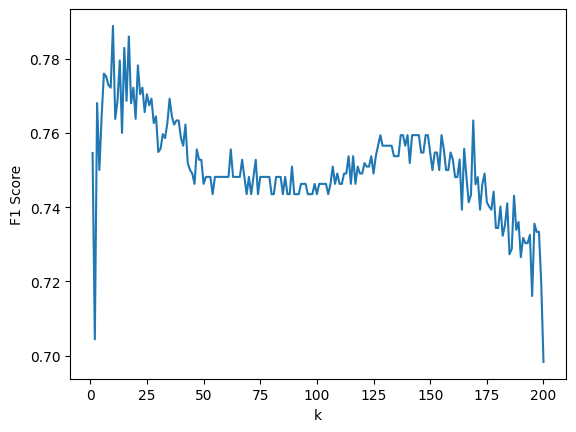

In [95]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.neighbors import NearestNeighbors


# Create a function for prediction and evaluation
def predict_and_evaluate(X, y, k_values, n_splits=10):
    results = []

    # Perform K-Fold cross-validation
    kf = KFold(n_splits=n_splits, shuffle=True)

    for k in k_values:
        y_pred = []
        y_true = []

        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Create nearest neighbors object
            nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')
            nn.fit(X_train)

            # Find the k nearest neighbors to the test set
            distances, indices = nn.kneighbors(X_test)

            for i in range(len(X_test)):
                nbrs_diseased = y_train[indices[i]].flatten()
                predict = pd.Series(nbrs_diseased).mode()[0]  # Most common label
                y_pred.append(predict)
                y_true.append(y_test[i][0])

        # Calculate precision, recall, and F1 scores
        (p, r, f, s) = precision_recall_fscore_support(y_true, y_pred, labels=[1])
        results.append((k, p, r, f, s))

    return results

# Main execution
X = df[selected_features].values
y = df[['disease']].values


# Define the range of k values to try
k_values = range(1, 201)  # Test k from 1 to 120
results = predict_and_evaluate(X, y, k_values)

# # Print the results
# for k, p, r, f, s in results:
#     print(f'k={k}, precision={p}, recall={r}, f-score={f}, support={s}')

plt.plot([x[0] for x in results], [x[3] for x in results])
plt.xlabel('k')
plt.ylabel('F1 Score')


The f1-score appears to be the highest when k is near 10, so we will select that as our k value. Interestingly, we see two maxima for this graph.

In [99]:
### Challenge Dataset (replace with name of test file)
df = pd.read_csv('cleveland-test-sample.csv')

# Rename 'num' column to 'disease' and change 1,2,3,4 to 1
df = df.rename({'num':'disease'}, axis=1)
df['disease'] = df.disease.apply(lambda x: min(x, 1))

# get rid of missing data
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# standardize numeric features
df['age_s'] = (df.age - df.age.mean())/df.age.std()
df['thalach_s'] = (df.thalach - df.thalach.mean())/df.thalach.std()
df['oldpeak_s'] = (df.oldpeak - df.oldpeak.mean())/df.oldpeak.std()

X = df[selected_features].values
y = df[['disease']].values

nn = NearestNeighbors(n_neighbors=10, metric='euclidean', algorithm='auto')

nn.fit(X)

distances, indices = nn.kneighbors(X)

y_pred = []
y_true = []
for i in range(len(X)):
    nbrs_diseased = y[indices[i]].flatten()
    predict = pd.Series(nbrs_diseased).mode()[0]  # Most common label
    y_pred.append(predict)
    y_true.append(y[i][0])

(p, r, f, s) = precision_recall_fscore_support(y_true, y_pred, labels=[1])
print(f'precision={p}, recall={r}, f-score={f}, support={s}')

precision=[0.8125], recall=[0.72222222], f-score=[0.76470588], support=[18]
